In [1]:
import pandas as pd

In [10]:
run_times = pd.read_excel('../DataScienceinPythonDataPrepEDA-230717-120846/Data/run_times.xlsx')
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [11]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                     object
dtype: object

In [12]:
run_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          5 non-null      object        
 1   Run Time      5 non-null      float64       
 2   Warm Up Time  5 non-null      object        
 3   Location      5 non-null      object        
 4   Run Date      5 non-null      datetime64[ns]
 5   Race Date     5 non-null      datetime64[ns]
 6   Rain          5 non-null      bool          
 7   Fee           5 non-null      object        
dtypes: bool(1), datetime64[ns](2), float64(1), object(4)
memory usage: 417.0+ bytes


In [13]:
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [14]:
# change Fee from object to numeric
pd.to_numeric(run_times.Fee.str.replace('$',''))

0    0.0
1    0.0
2    2.5
3    0.0
4    2.5
Name: Fee, dtype: float64

In [15]:
# change Warm Up Time from object to numeric
pd.to_numeric(run_times["Warm Up Time"], errors='coerce')  #uncovertible values to NaN

0    3.5
1    3.5
2    NaN
3    2.2
4    2.0
Name: Warm Up Time, dtype: float64

In [16]:
# remove the min from the Warm Up Time (google: str.replace nan)
run_times['Warm Up Time'].str.replace(' min', '')

0    NaN
1    NaN
2      3
3    NaN
4    NaN
Name: Warm Up Time, dtype: object

In [17]:
# remove the min from the Warm Up Time
run_times['Warm Up Time'].astype('str').str.replace(' min', '')

0    3.5
1    3.5
2      3
3    2.2
4      2
Name: Warm Up Time, dtype: object

In [18]:
# change the Rain column from boolean to int
run_times.Rain.astype('int')

0    0
1    1
2    0
3    0
4    0
Name: Rain, dtype: int32

## Missing Data

In [19]:
df = pd.read_excel('../DataScienceinPythonDataPrepEDA-230717-120846/Data/Student Grades.xlsx')

In [20]:
df.tail()

,Student,Class,Year,Grade
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [21]:
import numpy as np
np.NaN

nan

In [22]:
pd.NA

<NA>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  84 non-null     object 
 1   Class    83 non-null     object 
 2   Year     80 non-null     object 
 3   Grade    82 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.8+ KB


In [25]:
df.Year.value_counts(dropna=False)  #6 missing values in Year

Year
Freshman     35
Sophomore    24
Junior       20
NaN           6
Senior        1
Name: count, dtype: int64

In [27]:
df.isna().sum()

Student    2
Class      3
Year       6
Grade      4
dtype: int64

In [29]:
df[df.isna().any(axis=1)]  #return rows with missing values

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [30]:
df[df.isna().any(axis=1)].dropna()  #drop all rows with NaNs but dropna() not actually change df

,Student,Class,Year,Grade


In [31]:
df[df.isna().any(axis=1)].dropna(subset=['Student', 'Class']) #drop rows with NaNs at Student and Class column only

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [34]:
df.dropna(subset=['Student', 'Class'], inplace=True)  #tooltip - this can drop NaNs from df

In [35]:
df.shape #removed 86>82

(82, 4)

In [37]:
df[df.Grade.isna()]

,Student,Class,Year,Grade
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [38]:
df.Grade.mean()

85.55

In [39]:
df.Grade.fillna(df.Grade.mean())  #fill the missing values with its mean

0     86.00
1     86.00
2     86.00
3     87.00
4     90.00
      ...  
77    85.00
78    93.00
79    91.00
80    87.00
84    85.55
Name: Grade, Length: 82, dtype: float64

In [40]:
df.Grade  #still have NaN and not replaced

0     86.0
1     86.0
2     86.0
3     87.0
4     90.0
      ... 
77    85.0
78    93.0
79    91.0
80    87.0
84     NaN
Name: Grade, Length: 82, dtype: float64

In [41]:
df.Grade.fillna(df.Grade.mean(), inplace=True)

In [42]:
df.Grade

0     86.00
1     86.00
2     86.00
3     87.00
4     90.00
      ...  
77    85.00
78    93.00
79    91.00
80    87.00
84    85.55
Name: Grade, Length: 82, dtype: float64

In [43]:
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [44]:
df[df.Class == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [45]:
df.loc[7, 'Year'] = 'Freshman'

In [46]:
df[df.Class == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,Freshman,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


## Inconsistent Text & Typos

In [47]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [48]:
df.Class.value_counts()  #inconsistent - Python & EDA

Class
Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: count, dtype: int64

In [50]:
df[df.Class.isin(['Exploratory Data Analysis', 'EDA'])]

,Student,Class,Year,Grade
58,Evelyn,Exploratory Data Analysis,Sophomore,89.00
59,Jack,Exploratory Data Analysis,Sophomore,84.00
60,Ella,Exploratory Data Analysis,Sophomore,200.00
61,Chloe,Exploratory Data Analysis,Sophomore,87.00
62,Landon,Exploratory Data Analysis,Junior,85.55
63,Christian,Exploratory Data Analysis,Junior,77.00
64,Jordan,Exploratory Data Analysis,Junior,83.00
65,Jonathan,Exploratory Data Analysis,Junior,82.00
66,Levi,Exploratory Data Analysis,Junior,91.00
67,Victoria,Exploratory Data Analysis,Junior,90.00


In [51]:
df[df.Class.isin(['Intro to Python', 'Python'])] #Mia with 80.0 might be duplicate

,Student,Class,Year,Grade
12,Alexander,Intro to Python,Freshman,85.0
13,Logan,Intro to Python,Freshman,85.0
14,James,Intro to Python,Freshman,82.0
15,Daniel,Intro to Python,Freshman,85.0
16,Elijah,Intro to Python,Freshman,85.0
17,Benjamin,Intro to Python,Freshman,81.0
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Python,Freshman,80.0
20,Jayden,Intro to Python,Freshman,82.0
21,Aiden,Intro to Python,Freshman,86.0


In [52]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [53]:
df.Year.value_counts() #good

Year
Freshman     36
Sophomore    24
Junior       19
Senior        1
Name: count, dtype: int64

In [54]:
df.Grade.describe() #max grade 200??

count     82.000000
mean      85.550000
std       15.443965
min       45.000000
25%       81.000000
50%       85.275000
75%       89.750000
max      200.000000
Name: Grade, dtype: float64

In [55]:
df[df.Grade >100]

,Student,Class,Year,Grade
60,Ella,Exploratory Data Analysis,Sophomore,200.0


In [56]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: count, dtype: int64

In [58]:
df.Class = np.where(df.Class == 'EDA', 'Exploratory Data Analysis', df.Class)  #(condition, if_true, if_false)
df.Class

0              Freshman Seminar
1              Freshman Seminar
2              Freshman Seminar
3              Freshman Seminar
4              Freshman Seminar
                ...            
77    Exploratory Data Analysis
78    Exploratory Data Analysis
79    Exploratory Data Analysis
80    Exploratory Data Analysis
84    Exploratory Data Analysis
Name: Class, Length: 82, dtype: object

In [61]:
df.Class.value_counts()

Class
Intro to Python              26
Exploratory Data Analysis    24
Intro to SQL                 20
Freshman Seminar             12
Name: count, dtype: int64

In [60]:
df.Class = np.where(df.Class == 'Python', 'Intro to Python', df.Class)  #(condition, if_true, if_false)
df.Class

0              Freshman Seminar
1              Freshman Seminar
2              Freshman Seminar
3              Freshman Seminar
4              Freshman Seminar
                ...            
77    Exploratory Data Analysis
78    Exploratory Data Analysis
79    Exploratory Data Analysis
80    Exploratory Data Analysis
84    Exploratory Data Analysis
Name: Class, Length: 82, dtype: object

In [63]:
df.Grade = np.where(df.Grade > 100, 100, df.Grade)  #(condition, if_true, if_false) ;also can df.Grade-N
df.Grade.describe()

count     82.000000
mean      84.330488
std        8.824663
min       45.000000
25%       81.000000
50%       85.275000
75%       89.750000
max      100.000000
Name: Grade, dtype: float64

In [ ]:
#impute with map values

In [64]:
df_grades = pd.read_excel('../DataScienceinPythonDataPrepEDA-230717-120846/Data/Student Grades.xlsx')
df_grades.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [65]:
df_grades.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [70]:
class_mappings = {'Intro to Python': 'Intro to Python',
                 'Intro to SQL': 'Intro to SQL',
                 'EDA': 'Exploratory Data Analysis',
                 'Freshman Seminar': 'Freshman Seminar',
                 'Exploratory Data Analysis': 'Exploratory Data Analysis',
                 'Python': 'Intro to Python'}

In [73]:
df_grades.Class = df_grades.Class.map(class_mappings) #same with np.where
df_grades.Class.value_counts()

Class
Intro to Python              26
Exploratory Data Analysis    25
Intro to SQL                 20
Freshman Seminar             12
Name: count, dtype: int64

In [ ]:
#cleaning text

In [74]:
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [75]:
run_times.Location

0     “school”
1       School
2    “the gym”
3     “school”
4        “gym”
Name: Location, dtype: object

In [81]:
#have the string in lowercase + replace 'the' + strip “”
run_times.Location = run_times.Location.str.lower().str.replace('the','').str.strip('“”')  
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,school,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,school,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,gym,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,school,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,gym,2023-05-10 16:30:00,2023-06-15,False,$2.50


## Duplicate Data

In [83]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [88]:
df[df.duplicated(keep=False)] #tooltip - keep first/false/last

,Student,Class,Year,Grade
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Intro to Python,Freshman,80.0
42,Isaac,Intro to SQL,Sophomore,96.0
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


In [89]:
df.drop_duplicates(inplace=True)  #will not drop duplicates in df ; use inplace

In [90]:
df.iloc[40:45, :]

,Student,Class,Year,Grade
41,Charlotte,Intro to SQL,Sophomore,92.0
42,Isaac,Intro to SQL,Sophomore,96.0
45,Harper,Intro to SQL,Sophomore,93.0
46,Ryan,Intro to SQL,Sophomore,76.0
47,Sofia,Intro to SQL,Sophomore,79.0


In [94]:
df.reset_index(drop=True, inplace=True)  #drop=True drop the index new column
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
74,Aaron,Exploratory Data Analysis,Junior,85.00
75,Charles,Exploratory Data Analysis,Junior,93.00
76,Connor,Exploratory Data Analysis,Junior,91.00
77,Riley,Exploratory Data Analysis,Junior,87.00


## Outliers

In [ ]:
#histograms

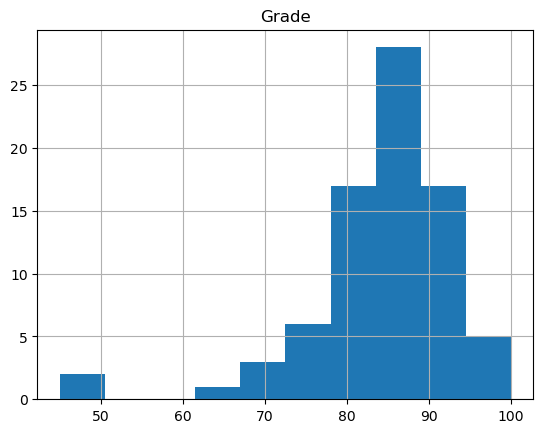

In [96]:
df.hist();

In [97]:
df.Grade.max() - df.Grade.min()  #range of max - min = bins for individual grades

55.0

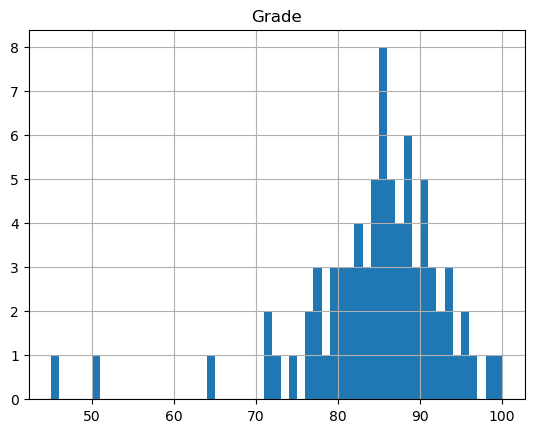

In [98]:
df.hist(bins=55);

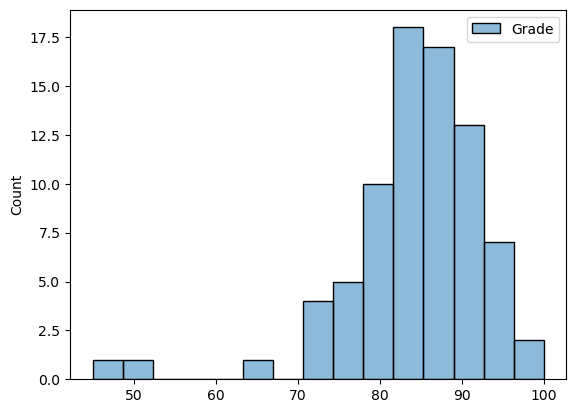

In [99]:
import seaborn as sns
sns.histplot(df);  #semicolon removes the output

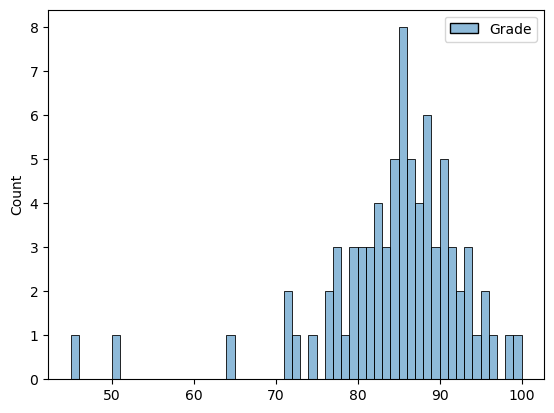

In [101]:
sns.histplot(df, binwidth=1);  #binwidth=1 inidvidual grades

In [102]:
#boxplots

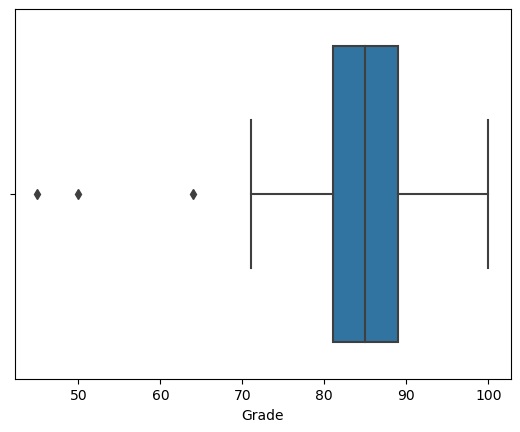

In [104]:
sns.boxplot(x=df.Grade);  #3 outliers

In [105]:
q25, q50, q75 = np.percentile(df.Grade, (25, 50, 75))

In [106]:
iqr = q75 - q25

In [107]:
min_grade = q25 - 1.5*iqr
max_grade = q75 + 1.5*iqr

In [108]:
min_grade, q25, q50, q75, max_grade

(69.0, 81.0, 85.0, 89.0, 101.0)

In [110]:
df[df.Grade < 69]  #less than min grade is the outliers

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,50.0
53,Wyatt,Intro to SQL,Sophomore,45.0
66,Jaxon,Exploratory Data Analysis,Junior,64.0


In [111]:
#std. deviation

In [112]:
mean = np.mean(df.Grade)

In [113]:
sd = np.std(df.Grade)

In [114]:
mean, sd

(84.08987341772152, 8.723725033779411)

In [115]:
#create a list of comprehension using loop - to return 3*sd
#return grade through grades in Grade column
#return if grade < mean-3*sd or > mean+3*sd
[grade for grade in df.Grade if (grade < mean - 3*sd) or (grade > mean + 3*sd) ]

[50.0, 45.0]

In [116]:
#handling outliers

In [118]:
df.shape

(79, 4)

In [125]:
df[df.Grade < 60]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,50.0
53,Wyatt,Intro to SQL,Sophomore,45.0


In [121]:
df.drop([37, 56])  #option 1 - drop rows

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
74,Aaron,Exploratory Data Analysis,Junior,85.00
75,Charles,Exploratory Data Analysis,Junior,93.00
76,Connor,Exploratory Data Analysis,Junior,91.00
77,Riley,Exploratory Data Analysis,Junior,87.00


In [122]:
df[df.Grade > 60]  #option 2 - keep non outliers

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
74,Aaron,Exploratory Data Analysis,Junior,85.00
75,Charles,Exploratory Data Analysis,Junior,93.00
76,Connor,Exploratory Data Analysis,Junior,91.00
77,Riley,Exploratory Data Analysis,Junior,87.00


In [128]:
min_grade = df[df.Grade >= 60].Grade.min()  #option 3 - find min within non outliers 
min_grade

64.0

In [132]:
df.Grade = np.where(df.Grade < 60, min_grade, df.Grade)  #impute with the min
df.loc[[36, 53]]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,64.0
53,Wyatt,Intro to SQL,Sophomore,64.0


In [135]:
df[df.Student == 'John'] 

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,74.0


In [134]:
df.loc[36, 'Grade'] = 74  #option 4 - domain expertise

## Creating New Columns

In [ ]:
#numeric column

In [138]:
groceries = pd.read_excel('../DataScienceinPythonDataPrepEDA-230717-120846/Data/Groceries.xlsx')

In [139]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15


In [144]:
groceries['New_Column'] = round(groceries.Price_Dollars * 1.05, 2)  #to create new column use []

In [146]:
groceries['Total Inventory'] = groceries.Inventory.sum()  #sum the Inventory
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_Column,Total Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857


In [150]:
#create a new percent inventory column
groceries['Percent Inventory'] = round(groceries['Inventory']/groceries['Total Inventory'] * 100, 2)  
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_Column,Total Inventory,Percent Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05


In [153]:
#flag inventory<50 as low inventory
groceries['Low Inventory'] = np.where(groceries.Inventory < 50, 'Low Inventory', '')
groceries.tail()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_Column,Total Inventory,Percent Inventory,Low Inventory
20,P100030,Pantry: Snacks,Raisins,2.99,5,2023-06-10 12:38:00,2023-06-24,3.14,4857,0.10,Low Inventory
21,P100031,Frozen: Frozen Snacks,Chicken Nuggets,6.99,85,2023-05-28 22:02:00,2023-06-28,7.34,4857,1.75,
22,P100032,Frozen: Frozen Snacks,Spinach Dip,4.96,76,2023-05-28 22:05:00,2023-06-28,5.21,4857,1.56,
23,P100033,Frozen: Frozen Fruit,Frozen Blueberries,10.99,162,2023-05-28 22:14:00,2023-06-28,11.54,4857,3.34,
24,P100034,Frozen: Frozen Fruit,Frozen Pineapple,7.96,178,2023-05-28 22:11:00,2023-06-28,8.36,4857,3.66,


In [154]:
#datetime column

In [159]:
groceries['Last_Updated_Time'] = groceries.Last_Updated.dt.time  #extract the time 
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_Column,Total Inventory,Percent Inventory,Low Inventory,Last Updated Time,Last_Updated_Time
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,15:35:00
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,18:30:00
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,17:22:00
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,16:29:00
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,18:10:00


In [174]:
groceries['Shipment_Date_DOW'] = groceries.Next_Scheduled_Shipment.dt.dayofweek
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_Column,Total Inventory,Percent Inventory,Low Inventory,Last Updated Time,Last_Updated_Time,Shipment_Date_DOW
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,15:35:00,3
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,18:30:00,3
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,17:22:00,3
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,16:29:00,3
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,18:10:00,3


In [175]:
dow_mapping = {0: 'Monday',   #map the DOW to its day
              1: 'Tuesday',
              2: 'Wednesday',
              3: 'Thursday',
              4: 'Friday',
              5: 'Saturday',
              6: 'Sunday'}

In [176]:
groceries['Shipment_Date_DOW'] = groceries['Shipment_Date_DOW'].map(dow_mapping)
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_Column,Total Inventory,Percent Inventory,Low Inventory,Last Updated Time,Last_Updated_Time,Shipment_Date_DOW
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,15:35:00,Thursday
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,18:30:00,Thursday
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,17:22:00,Thursday
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,16:29:00,Thursday
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,18:10:00,Thursday


In [178]:
 #use timedelta for operation in datetime
groceries['New_Shipment_Date'] = groceries.Next_Scheduled_Shipment + pd.to_timedelta(1, 'D')  #add 1 Day
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_Column,Total Inventory,Percent Inventory,Low Inventory,Last Updated Time,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,15:35:00,Thursday,2023-06-16
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,18:30:00,Thursday,2023-06-16
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,17:22:00,Thursday,2023-06-16
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,16:29:00,Thursday,2023-06-16
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,18:10:00,Thursday,2023-06-16


In [185]:
groceries['New_Shipment_Date'] = np.where(groceries.Category == 'Produce: Fruit', 
        groceries.Next_Scheduled_Shipment + pd.to_timedelta(1, 'D'),
        groceries.Next_Scheduled_Shipment)
groceries.head(8)

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_Column,Total Inventory,Percent Inventory,Low Inventory,Last Updated Time,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Product_ID_Num
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,15:35:00,Thursday,2023-06-16,100010
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,18:30:00,Thursday,2023-06-16,100011
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,17:22:00,Thursday,2023-06-16,100012
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,16:29:00,Thursday,2023-06-16,100013
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,18:10:00,Thursday,2023-06-16,100014
5,P100015,Produce: Fruit,Watermelon,5.99,99,2023-06-12 19:15:00,2023-06-15,6.29,4857,2.04,,19:15:00,19:15:00,Thursday,2023-06-16,100015
6,P100016,Produce: Vegetable,Cabbage,1.78,78,2023-06-12 19:25:00,2023-06-15,1.87,4857,1.61,,19:25:00,19:25:00,Thursday,2023-06-15,100016
7,P100017,Produce: Vegetable,Carrots,2.00,200,2023-06-12 18:05:00,2023-06-15,2.10,4857,4.12,,18:05:00,18:05:00,Thursday,2023-06-15,100017


In [181]:
#create text column

In [183]:
groceries['Product_ID_Num'] = groceries.Product_ID.str[1:]  #remove P(at index 0) in ID 
groceries.dtypes  #object;  change to int

Product_ID                         object
Category                           object
Item                               object
Price_Dollars                     float64
Inventory                           int64
Last_Updated               datetime64[ns]
Next_Scheduled_Shipment    datetime64[ns]
New_Column                        float64
Total Inventory                     int64
Percent Inventory                 float64
Low Inventory                      object
Last Updated Time                  object
Last_Updated_Time                  object
Shipment_Date_DOW                  object
New_Shipment_Date          datetime64[ns]
Product_ID_Num                     object
dtype: object

In [184]:
groceries['Product_ID_Num'] = groceries['Product_ID_Num'].astype('int')  #assign astype int to the column
groceries.dtypes

Product_ID                         object
Category                           object
Item                               object
Price_Dollars                     float64
Inventory                           int64
Last_Updated               datetime64[ns]
Next_Scheduled_Shipment    datetime64[ns]
New_Column                        float64
Total Inventory                     int64
Percent Inventory                 float64
Low Inventory                      object
Last Updated Time                  object
Last_Updated_Time                  object
Shipment_Date_DOW                  object
New_Shipment_Date          datetime64[ns]
Product_ID_Num                      int32
dtype: object

In [187]:
pd.DataFrame(groceries.Category.str.split(':'))  #split the string by ':'

,Category
0,"[Produce, Fruit]"
1,"[Produce, Fruit]"
2,"[Produce, Fruit]"
3,"[Produce, Fruit]"
4,"[Produce, Fruit]"
5,"[Produce, Fruit]"
6,"[Produce, Vegetable]"
7,"[Produce, Vegetable]"
8,"[Produce, Vegetable]"
9,"[Produce, Vegetable]"


In [189]:
pd.DataFrame(groceries.Category.str.split(':').to_list()) #split string to 2 list columns

,0,1
0,Produce,Fruit
1,Produce,Fruit
2,Produce,Fruit
3,Produce,Fruit
4,Produce,Fruit
5,Produce,Fruit
6,Produce,Vegetable
7,Produce,Vegetable
8,Produce,Vegetable
9,Produce,Vegetable


In [191]:
groceries[['Category', 'Subcategory']] = pd.DataFrame(groceries.Category.str.split(':').to_list())
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_Column,Total Inventory,Percent Inventory,Low Inventory,Last Updated Time,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Product_ID_Num,Subcategory
0,P100010,Produce,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,15:35:00,Thursday,2023-06-16,100010,Fruit
1,P100011,Produce,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,18:30:00,Thursday,2023-06-16,100011,Fruit
2,P100012,Produce,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,17:22:00,Thursday,2023-06-16,100012,Fruit
3,P100013,Produce,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,16:29:00,Thursday,2023-06-16,100013,Fruit
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,18:10:00,Thursday,2023-06-16,100014,Fruit


In [194]:
# groceries.Item.str.contains('organic|Organic', regex=True)
#same as above but lowercase the column first then find 
groceries['Organic'] = groceries.Item.str.lower().str.contains('organic')  
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_Column,Total Inventory,Percent Inventory,Low Inventory,Last Updated Time,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Product_ID_Num,Subcategory,Organic
0,P100010,Produce,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,15:35:00,Thursday,2023-06-16,100010,Fruit,False
1,P100011,Produce,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,18:30:00,Thursday,2023-06-16,100011,Fruit,False
2,P100012,Produce,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,17:22:00,Thursday,2023-06-16,100012,Fruit,False
3,P100013,Produce,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,16:29:00,Thursday,2023-06-16,100013,Fruit,False
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,18:10:00,Thursday,2023-06-16,100014,Fruit,True


In [195]:
#reorder the column
groceries[['Product_ID', 'Product_ID_Num', 'Category', 'Subcategory',
           'Item', 'Organic', 'Price_Dollars',
           'Inventory', 'Percent Inventory', 'Low Inventory',
           'Last_Updated', 'Last_Updated_Time',
           'Next_Scheduled_Shipment', 'Shipment_Date_DOW']].head()

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
0,P100010,100010,Produce,Fruit,Apple,False,1.50,349,7.19,,2023-06-12 15:35:00,15:35:00,2023-06-15,Thursday
1,P100011,100011,Produce,Fruit,Banana,False,0.40,500,10.29,,2023-06-12 18:30:00,18:30:00,2023-06-15,Thursday
2,P100012,100012,Produce,Fruit,Grapes,False,4.00,200,4.12,,2023-06-12 17:22:00,17:22:00,2023-06-15,Thursday
3,P100013,100013,Produce,Fruit,Grapefruit,False,0.99,50,1.03,,2023-06-12 16:29:00,16:29:00,2023-06-15,Thursday
4,P100014,100014,Produce,Fruit,Organic Strawberries,True,3.99,148,3.05,,2023-06-12 18:10:00,18:10:00,2023-06-15,Thursday


In [196]:
groceries_with_new_columns = groceries[['Product_ID', 'Product_ID_Num', 'Category', 'Subcategory',
           'Item', 'Organic', 'Price_Dollars',
           'Inventory', 'Percent Inventory', 'Low Inventory',
           'Last_Updated', 'Last_Updated_Time',
           'Next_Scheduled_Shipment', 'Shipment_Date_DOW']]

In [198]:
# save the df as pickle to be used in notebook
groceries_with_new_columns.to_pickle('groceries_with_new_columns.pkl')